# CA 06 - Customer Segmentation using K-means Clustering

## Objective: 
Perform customer segmentation using the k-means clustering algorithm in order to better understand the different types of customers in a given dataset.

## Dataset: 
"Mall_Customers.csv" <br>
https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv <br>
This dataset contains the following attributes: 
1. CustomerID: Unique ID for each customer
2. Gender: Male or Female
3. Age: Age of the customer
4. Annual Income (k$): Annual income of the customer in thousands of dollars
5. Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature (higher scores indicate higher spending)

## Tasks


5. Write a report summarizing your findings: 
* a. Describe the dataset and its attributes 
* b. Detail the steps taken for data preprocessing, feature selection, and scaling 
* c. Explain the process of determining the optimal number of clusters 
* d.Describe the clusters and their characteristics 
* e. Discuss any insights or recommendations based on your analysis

### 1. Load the dataset and perform exploratory data analysis (EDA): 
* a. Import the necessary libraries (pandas, numpy, matplotlib, seaborn) 
* b. Load the dataset using pandas and display the first few rows 
* c. Check for missing values and handle them appropriately 
* d. Visualize the distribution of features using histograms or boxplots

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv")

In [3]:
# Display the first few rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Look into any missing values

df_number_of_missing = df.isna().sum()
df_number_of_missing

# there is no missing values in each of the columns

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Create a dummy column for the gender

df= pd.concat([df, pd.get_dummies(df['Genre'])], axis = 1)
print("Modified DataFrame:\n", df)

Modified DataFrame:
      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Female  Male  
0         0     1  
1         0     1  
2     

In [6]:
# create a definition for plotting a boxplot to compare the columns
# use a Seaborn to plot the histgram

# set a style for the Seaborn Plots
sns.set_style("whitegrid")
sns.set_palette("muted")

def plot_visual(col_name):
    
        plt.figure(figsize = (10,6))
        # create a pivot table to gather the columns
        table_var = df[col_name]
        
        sns.histplot(table_var,bins = 10, edgecolor = "black", color = "grey", kde = True)
        
        plt.title(f"Boxplot of {col_name}")
        plt.xlabel("Data", fontsize = 14)
        plt.ylabel("Frequence", fontsize = 14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.show()

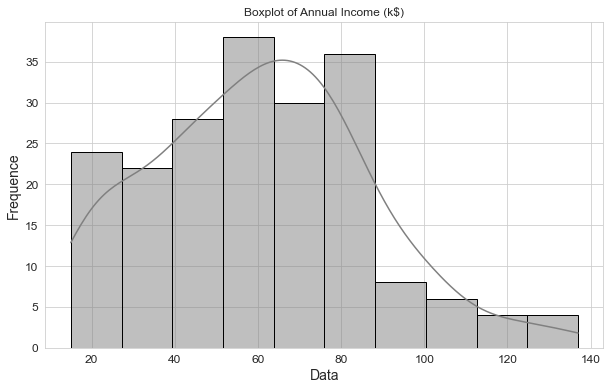

In [7]:
plot_visual('Annual Income (k$)')

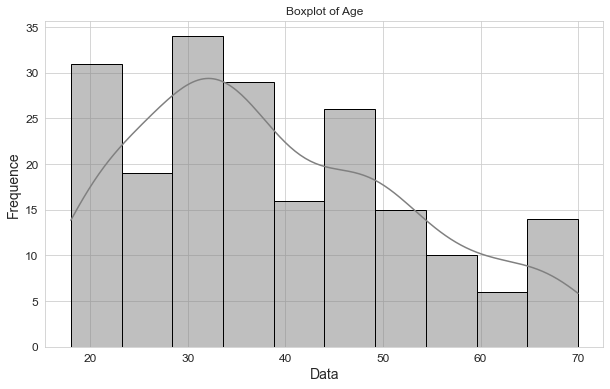

In [8]:
plot_visual('Age')

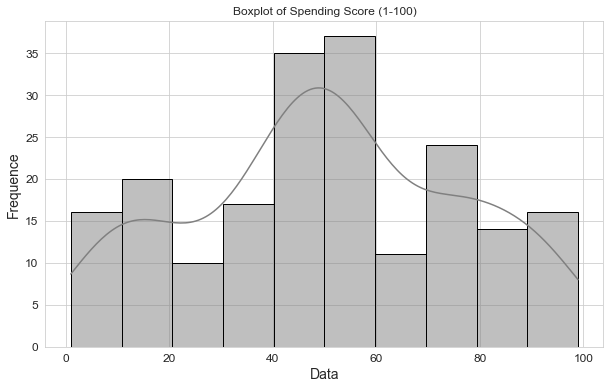

In [9]:
plot_visual('Spending Score (1-100)')

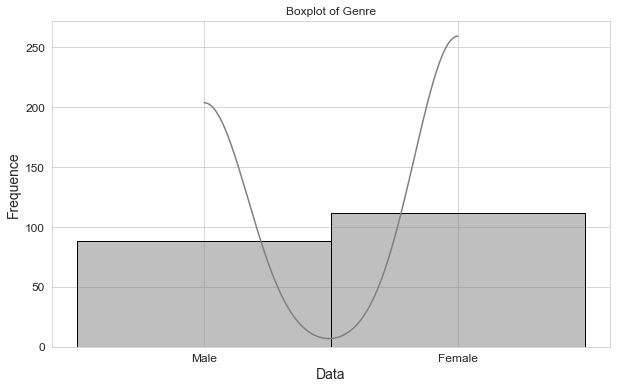

In [10]:
plot_visual('Genre')

### 2. Prepare the data for clustering: 
* a. Perform any necessary feature scaling (StandardScaler or MinMaxScaler) 
* b. Choose the appropriate features for clustering (you may start with 'Annual Income' and 'Spending Score') 
* c. Create a new DataFrame with only the selected features

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Female', 'Male'],
      dtype='object')

In [13]:
# Select the features preference for clustering
# we only want annual income and spending score in this case
df_features = ['Annual Income (k$)',
       'Spending Score (1-100)']

# scale the features using StandardScaler
scaler = StandardScaler()
scaler_features = scaler.fit_transform(df[df_features])

In [14]:
# create a new dataframe with the selected features
scaled_df = pd.DataFrame(scaler_features, columns = df_features)

### 3. Implement k-means clustering: 
* a. Import the KMeans class from the sklearn.cluster module 
* b. Use the Silhouette Method to determine the optimal number of clusters 
* c. Train the KMeans model with the optimal number of clusters 
* d. Obtain the cluster assignments for each data point

In [16]:
# import necessary modules:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Using the silhouette_score method to determine the number of clusters in the model
# generate a function to find the optimal number of clusters

 
# empty list to store the Silhouette scores for each number of clusters (k)
silhouette_scores = []
max_k = 10
num_k = range(2, max_k +1)

for k in num_k:
    # creates a KMeans object with the current k and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(scaler_features)
    silhouette = silhouette_score(scaler_features, labels)
    silhouette_scores.append(silhouette)

optimal_k = num_k[np.argmax(silhouette_scores)]

print(f"The optimal number of clusters: {optimal_k}")

The optimal number of clusters: 5


In [37]:
# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(scaler_features)


# Obtain the cluster assignments for each datga point:
cluster_assignments = kmeans.labels_

scaled_df["Cluster"] = cluster_assignments

In [38]:
print(scaled_df)

     Annual Income (k$)  Spending Score (1-100)  Cluster
0             -1.738999               -0.434801        3
1             -1.738999                1.195704        4
2             -1.700830               -1.715913        3
3             -1.700830                1.040418        4
4             -1.662660               -0.395980        3
..                  ...                     ...      ...
195            2.268791                1.118061        1
196            2.497807               -0.861839        2
197            2.497807                0.923953        1
198            2.917671               -1.250054        2
199            2.917671                1.273347        1

[200 rows x 3 columns]


### 4. Visualize and analyze the clusters: 
* a. Create a scatter plot of the selected features, colored by cluster assignment 
* b. Interpret the clusters and provide a brief description of each cluster 
* c. (Optional) Perform the same analysis with different sets of features and compare the results

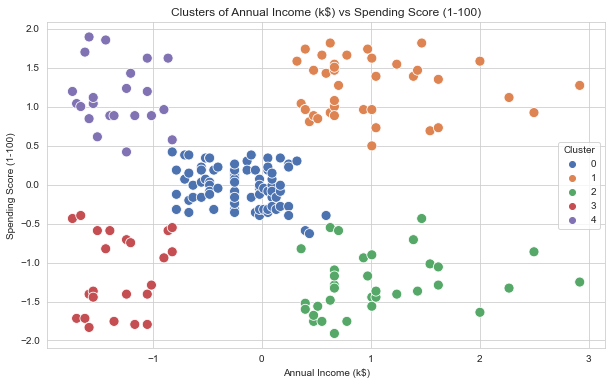

In [40]:
import matplotlib.pyplot as plt

def plot_clusters(data, x_feature, y_feature, cluster_col='Cluster'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_feature, y=y_feature, hue=cluster_col, palette="deep", s=100)
    plt.title(f"Clusters of {x_feature} vs {y_feature}")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title='Cluster')
    plt.show()

plot_clusters(scaled_df, 'Annual Income (k$)', 'Spending Score (1-100)')
